
# 💾 Данные
Берем данные из [кэгла](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data)

In [1]:
!pip install -q hvplot

# 📤 Импортируем либы

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

%matplotlib inline

# sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")

## 💾 Смотрим дату

In [3]:
df = pd.read_csv('/content/winequality-red.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df['quality_label'] = df['quality'].apply(lambda x: 'good' if x > 6.5 else 'bad')
df.drop(columns=['quality'], inplace=True)

# 📊 EDA



In [7]:
df['quality_label'].value_counts().hvplot.bar(
    title="Распределение качества вина",
    xlabel="Качество",
    ylabel="Количество",
    rot=0,
    color="blue"
)

:Bars   [quality_label]   (count)

# А что мы собсна предсказываем?

Не все модели умеют в определение классов, поэтому придумали предсказывать вероятности. Но как перенести бинарные классы в вероятности? Для этого есть множество функций:


---

## 1. Функции, используемые для оценки вероятностей

### Сигмоида (логистическая функция)
- **Формула**: $\sigma(x) = \frac{1}{1 + e^{-x}}$.
- **Особенности**:
  - Принимает значение от 0 до 1.
  - Широко используется в **логистической регрессии** и в **выходном слое нейронных сетей** для **бинарной** (двухклассовой) классификации.
- **Применение**:
  - В **логистической регрессии** вероятность класса $ P(y=1 \mid x) $ оценивается как $\sigma(w \cdot x + b)$.
  - В **бинарных нейронных сетях** (один выходной нейрон) сигмоида указывает вероятность принадлежности к классу «1».

### Softmax
- **Формула (для $k$-го класса)**:  
  $$
  \text{softmax}(z_k) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}
  $$
  где $K$ – количество классов, $z_j$ – логиты (сумма $\mathbf{w} \cdot \mathbf{x}$ + b) для каждого класса.
- **Особенности**:
  - Многоклассовый аналог сигмоиды.
  - Нормирует выходы нейронной сети так, чтобы они образовывали распределение вероятностей по всем классам.
- **Применение**:
  - В **многоклассовой классификации** в нейронных сетях.
  - В **многомерной (multinomial) логистической регрессии**.

---

## 2. Модели, которые используют данные функции

1. **Логистическая регрессия**  
   - Для **бинарной** классификации применяет сигмоиду.  
   - Для **многоклассовой** классификации (multinomial logistic regression) применяется softmax.  
   - Выдаёт как вероятность класса, так и «предсказанный» класс (по порогу 0.5 или по наибольшей вероятности для многоклассового случая).

2. **Нейронные сети**  
   - **Выходной слой** при бинарной классификации обычно содержит **один нейрон с сигмоидой** (или два нейрона с softmax, но это реже).  
   - **Для многоклассовой** (K классов) – **K нейронов** с функцией **softmax**.  
   - Результатом является вектор вероятностей по всем классам.

3. **Пробит-регрессия**  
   - Напоминает логистическую регрессию, но вместо сигмоиды используется пробит-функция.  
   - Реже встречается в практическом ML, но часто в статистической среде.

4. **Деревья принятия решений и ансамбли (Random Forest, Gradient Boosting)**  
   - Рассчитывают вероятности на основе пропорций классов в листьях (например, в **Random Forest** – среднее по всем деревьям о пропорции классов).  
   - Сами по себе предсказывают класс (то есть «какой класс набрал больше голосов»), но могут также давать вероятности, если посмотреть на распределение выборок по листу/по деревьям.

---

## 3. Модели, которые сразу оценивают класс

Любая модель классификации может выдать непосредственно «класс» на основе порога вероятности или иного правила. Однако есть модели, традиционно не работающие с вероятностями «из коробки»:

- **Дерево решений** по умолчанию может вернуть самый частотный класс в листе (или усреднить по правилам). Для вероятностей нужно дополнительно смотреть статистику по листьям.  

Тем не менее, большинство библиотек машинного обучения (например, scikit-learn) позволяют **включать режим «predict_proba»** или аналогичные механизмы, которые возвращают вектор вероятностей по классам.

---

### Итоги

- **Сигмоида** удобна для вывода вероятностей при **бинарной** классификации; **softmax** – при **многоклассовой**.  
- **Деревья**, **Random Forest**, **Gradient Boosting** могут выдавать вероятности, хотя и не всегда калиброванные так же «чисто», как в логистической регрессии или нейронных сетях.   
- **Оценка вероятностей** важна для задач, где нужно знать степень уверенности модели (например, в медицинских системах принятия решений или для ранжирования в информационном поиске).

Таким образом, выбор конкретной функции (сигмоида, softmax и т.д.) и способа получения вероятностей зависит от типа модели, формата задачи (бинарная или многоклассовая классификация) и требований к интерпретации результатов.

https://education.yandex.ru/handbook/ml/article/veroyatnostnyj-podhod-v-ml

#Обработка перед обучением


###Категории
**Label Encoding** просто присваивает каждой категории число, что может быть удобно для упорядоченных данных, но нежелательно для неупорядоченных.  
**One-Hot Encoding** превращает каждую категорию в отдельный бинарный признак, что устраняет ложный порядок, но увеличивает размерность данных.
###Числовые признаки
**Масштабирование (scaling)** – это процесс преобразования числовых признаков таким образом, чтобы они находились в схожем диапазоне или имели схожие статистические характеристики. Это важно, поскольку многие алгоритмы машинного обучения (например, градиентный спуск, KNN, SVM) чувствительны к разнице в масштабах признаков. Ниже приведено объяснение основных аспектов масштабирования:

### Основные методы масштабирования

1. **Стандартизация (Standard Scaling):**  
   Метод, реализованный в `StandardScaler`, преобразует каждый признак по формуле:
   $$
   x_{\text{scaled}} = \frac{x - \mu}{\sigma}
   $$
   где:
   - $ \mu $ – среднее значение признака,
   - $ \sigma $ – стандартное отклонение признака.

   **Результат:** признаки получат среднее значение 0 и стандартное отклонение 1. Это особенно полезно, если данные приблизительно нормально распределены.

2. **Нормализация (Min-Max Scaling):**  
   Приводит значения признака к определённому диапазону, например, от 0 до 1. Формула:
   $$
   x_{\text{scaled}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
   $$
   Этот метод полезен, когда требуется ограничить значения в заданном интервале.

**Логарифмирование**      
Логарифмирование признаков применяется для следующих целей:

- **Смягчение скошенности распределения:**  
  Если распределение признака сильно скошено (например, имеет длинный хвост справа), логарифмирование может приблизить его к нормальному распределению, что облегчает обучение модели.

- **Снижение влияния выбросов:**  
  Логарифмическое преобразование уменьшает масштаб больших значений, что помогает снизить их доминирующее влияние на модель.

- **Улучшение интерпретации:**  
  При логарифмировании разница между малыми значениями становится более заметной, а между большими — менее выраженной, что часто делает модель более стабильной и интерпретируемой.


## 🚀 Начинаем обучение моделей классификации!

Прежде чем приступить к обучению, нам нужно **разделить данные** на:
- **`X`** — массив с признаками, которые будут использоваться для обучения модели.
- **`y`** — массив с целевой переменной, в данном случае **качеством вина (`quality_label`)**.



## 🧱 Разделение данных на обучающую и тестовую выборки

Теперь разделим данные на **обучающую** и **тестовую** выборки.

- **Обучающая выборка** будет использоваться для тренировки модели.
- **Тестовая выборка** нужна, чтобы проверить, насколько хорошо модель справляется с предсказаниями на новых данных.



In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(['quality_label'], axis=1)
y = df['quality_label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def preprocess_data(df_train, df_test, target='SalePrice'):
    """
    Предобрабатывает обучающие и тестовые данные:
      - отделяет целевую переменную из обучающей выборки;
      - для категориальных признаков применяет OneHotEncoder;
      - для числовых признаков применяет StandardScaler;
      - объединяет полученные признаки и заполняет пропуски нулями.

    Аргументы:
      df_train: DataFrame с обучающими данными (содержит столбец target).
      df_test: DataFrame с тестовыми данными.
      target: Имя столбца с целевой переменной (по умолчанию 'SalePrice').

    Возвращает:
      processed_train: обработанный DataFrame для обучения.
      y_train: серия с целевой переменной.
      processed_test: обработанный DataFrame для тестирования.
    """

    # Определяем категориальные и числовые признаки
    categorical_cols = df_train.select_dtypes(include=['object']).columns
    numerical_cols = df_train.select_dtypes(exclude=['object']).columns

    # Инициализируем преобразователи
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    scaler = StandardScaler()

    # Обрабатываем обучающие данные
    encoded_train = ohe.fit_transform(df_train[categorical_cols])
    encoded_train_df = pd.DataFrame(encoded_train,
                                    columns=ohe.get_feature_names_out(categorical_cols),
                                    index=df_train.index)
    scaled_train = scaler.fit_transform(df_train[numerical_cols])
    scaled_train_df = pd.DataFrame(scaled_train,
                                   columns=numerical_cols,
                                   index=df_train.index)
    processed_train = pd.concat([encoded_train_df, scaled_train_df], axis=1).fillna(0)

    # Обрабатываем тестовые данные, используя обученные преобразователи
    encoded_test = ohe.transform(df_test[categorical_cols])
    encoded_test_df = pd.DataFrame(encoded_test,
                                   columns=ohe.get_feature_names_out(categorical_cols),
                                   index=df_test.index)
    # Приводим набор признаков к тому же набору, что и в обучающей выборке
    encoded_test_df = encoded_test_df.reindex(columns=encoded_train_df.columns, fill_value=0)
    scaled_test = scaler.transform(df_test[numerical_cols])
    scaled_test_df = pd.DataFrame(scaled_test,
                                  columns=numerical_cols,
                                  index=df_test.index)
    processed_test = pd.concat([encoded_test_df, scaled_test_df], axis=1).fillna(0)

    return processed_train, processed_test


In [10]:
X_train, X_test = preprocess_data(X_train, X_test)

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

## ✔️ Метрики для оценки классификации

Вот основные метрики, используемые для оценки моделей классификации:

> - **Точность (Accuracy)** — доля правильных предсказаний среди всех объектов:
$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$

> - **Точность (Precision)** — доля объектов, предсказанных как положительные, которые действительно положительные:
$$ Precision = \frac{TP}{TP + FP} $$

> - **Полнота (Recall)** — доля всех положительных объектов, которые были правильно предсказаны моделью:
$$ Recall = \frac{TP}{TP + FN} $$

> - **F1-мера (F1-score)** — среднее гармоническое между точностью и полнотой:
$$ F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall} $$

### 🔍 Обозначения:
- **TP (True Positive, Истинно положительные)** — количество объектов, правильно предсказанных как положительные.
- **TN (True Negative, Истинно отрицательные)** — количество объектов, правильно предсказанных как отрицательные.
- **FP (False Positive, Ложно положительные, "Ложные тревоги")** — количество объектов, ошибочно предсказанных как положительные.
- **FN (False Negative, Ложно отрицательные, "Пропущенные случаи")** — количество объектов, ошибочно предсказанных как отрицательные.

> 📌 Сравнение этих метрик:
- **Accuracy** удобен, но не подходит для несбалансированных данных.
- **Precision** важен, если ложноположительные ошибки критичны (например, диагностика болезней).
- **Recall** полезен, если важно не пропустить положительные примеры (например, обнаружение мошенничества).
- **F1-score** балансирует точность и полноту, особенно при несбалансированных классах.

> 📌 Интерпретация F1-score:
- Если **F1-score** близок к 1 — модель хорошо справляется с классификацией.
- Если **F1-score** низкий — модель либо часто даёт ложноположительные, либо ложноотрицательные результаты (или и то, и другое).



## 🏆 ROC AUC (Area Under the ROC Curve)

**ROC (Receiver Operating Characteristic) кривая** — это график, отображающий зависимость между:
- **TPR (True Positive Rate)**: $\displaystyle \text{TPR} = \frac{TP}{TP + FN}$, что по сути совпадает с Recall;
- **FPR (False Positive Rate)**: $\displaystyle \text{FPR} = \frac{FP}{FP + TN}$.

На оси **x** обычно откладывается FPR, а на оси **y** — TPR. Кривая строится, когда мы меняем порог классификации от 0 до 1 и для каждого порога смотрим соответствующие значения TPR и FPR.

### 📝 AUC (Area Under the Curve)
- **AUC** — это площадь под ROC-кривой.
- Чем больше площадь, тем лучше модель способна разделять (ранжировать) положительные и отрицательные объекты при различных порогах.

### 📌 Смысл про ранжирование
ROC AUC часто интерпретируют как **вероятность**, что произвольно выбранный **положительный** объект будет иметь более высокий предсказанный **скор (score, вероятность)**, чем произвольно выбранный **отрицательный** объект.  
Иными словами, если брать по одному объекту из положительного и отрицательного класса, модель с высоким AUC с большой вероятностью “поставит” положительный объект выше (даст ему большую вероятность/скор) в общем списке.

### 📌 Диапазоны значений ROC AUC
- **AUC = 1.0** — идеально отличает положительные объекты от отрицательных (все положительные имеют выше скор, чем любые отрицательные).
- **AUC = 0.5** — модель не лучше случайного угадывания.
- **AUC < 0.5** — модель “инвертирует” классы (положительным даёт более низкий скор, чем отрицательным). На практике может означать, что при “переворачивании” предсказаний модель станет хорошей.
- **Чем ближе AUC к 1, тем лучше**. Обычно AUC > 0.9 считается высоким, а в диапазоне 0.7–0.8 — приемлемым.

### 📌 Почему ROC AUC бывает полезен
- **Независим от порога**: оценивает качество модели во всём спектре возможных порогов, не привязываясь к одному конкретному.
- **Справедливо сравнение моделей**: даже если две модели имеют одинаковый Accuracy при каком-то одном пороге, у них может сильно отличаться ROC AUC; это значит, что потенциал улучшения с выбором оптимального порога у одной модели выше, чем у другой.
- **Устойчив к дисбалансу классов**: в отличие от Accuracy, AUC лучше показывает “способность различать” классы, даже если один класс сильно преобладает.

### 🔍 Примеры использования ROC AUC
1. **Медицинская диагностика**: Представьте, что модель предсказывает вероятность болезни. Построив ROC-кривую, врач (или исследователь) может выбрать оптимальный порог, при котором полнота (Recall) и уровень ложных тревог (FPR) будут на приемлемом уровне. Например, AUC = 0.85 означает, что в 85% случаев положительный пациент получит более высокую оценку риска, чем отрицательный.
2. **Кредитный скоринг**: Банк оценивает заявку на кредит. Модель выдаёт скор, насколько клиент надёжен. С высоким ROC AUC банк может эффективнее разделять “надежных” и “рискованных” заёмщиков.  
3. **Обнаружение мошенничества**: Система анализирует транзакции и присваивает вероятность мошенничества. При достаточно высоком AUC операции, действительно являющиеся мошенническими, имеют высокую вероятность быть “выявленными” раньше, чем законные транзакции.

---

### Итог
- **Accuracy, Precision, Recall, F1-score** дают представление об ошибках классификации, но чувствительны к выбору порога и дисбалансу классов.
- **ROC AUC** помогает понять, насколько хорошо модель **ранжирует** объекты, отделяя положительные от отрицательных во всём диапазоне порогов. Значения **ROC AUC** находятся в диапазоне от 0 до 1, где 1 — идеальная классификация, 0.5 — модель, не лучше случайного угадывания.  

Использование всех метрик в комплексе помогает полноценно оценить качество модели и выбрать наиболее подходящий вариант под конкретную задачу.

Картинки и подробности туть: https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii


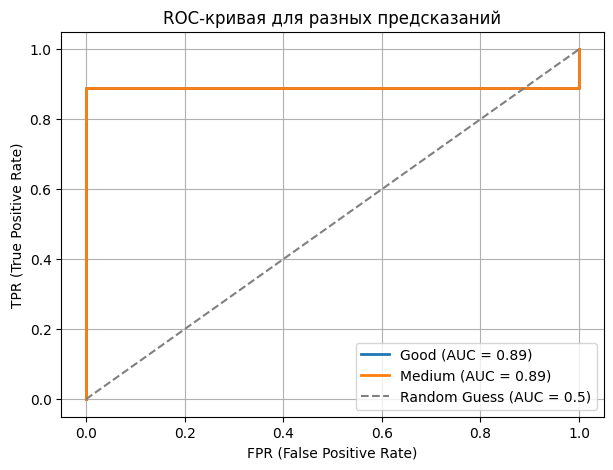

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Случайная истинная разметка (целевой вектор)
# 0 - отрицательный класс, 1 - положительный класс
y_true = np.array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
                   1, 0, 1, 1, 1, 0, 0])

# "Хорошие" предсказания (высокие вероятности для 1, низкие для 0)
y_scores_good = np.array([0.05, 0.02, 0.10, 0.88, 0.72,
                          0.15, 0.05, 0.80, 0.30, 0.90,
                          0.82, 0.40, 0.85, 0.92, 0.93,
                          0.10, 0.20])

# "Средние" предсказания (вероятности не так чётко разделяют классы)
y_scores_medium = np.array([0.25, 0.03, 0.45, 0.55, 0.65,
                            0.50, 0.05, 0.58, 0.52, 0.60,
                            0.62, 0.42, 0.55, 0.60, 0.63,
                            0.45, 0.45])


# Считаем FPR, TPR для каждой группы предсказаний
fpr_good,  tpr_good,  _ = roc_curve(y_true, y_scores_good)
fpr_med,   tpr_med,   _ = roc_curve(y_true, y_scores_medium)

# Считаем AUC для каждой группы предсказаний
roc_auc_good = auc(fpr_good, tpr_good)
roc_auc_med  = auc(fpr_med,  tpr_med)

# Строим график ROC-кривых
plt.figure(figsize=(7, 5))
plt.plot(fpr_good, tpr_good, label=f'Good (AUC = {roc_auc_good:.2f})', lw=2)
plt.plot(fpr_med,  tpr_med,  label=f'Medium (AUC = {roc_auc_med:.2f})', lw=2)

# Добавим линию, соответствующую случайному угадыванию (AUC=0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC = 0.5)')

plt.title('ROC-кривая для разных предсказаний')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import numpy as np

def cross_val(model, X, y, cv=3):
    pred = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return pred.mean()

def print_evaluate(true, predicted):
    accuracy = metrics.accuracy_score(true, predicted)
    precision = metrics.precision_score(true, predicted)
    recall = metrics.recall_score(true, predicted)
    f1 = metrics.f1_score(true, predicted)
    roc_auc = metrics.roc_auc_score(true, predicted)

    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)
    print("ROC AUC: ", roc_auc)
    print('__________________________________')

def evaluate(true, predicted):
    accuracy = metrics.accuracy_score(true, predicted)
    precision = metrics.precision_score(true, predicted)
    recall = metrics.recall_score(true, predicted)
    f1 = metrics.f1_score(true, predicted)
    roc_auc = metrics.roc_auc_score(true, predicted)

    return accuracy, precision, recall, f1, roc_auc

Подготовка к логистической регрессии


🔹 **Линейно разделимые классы**   
Логистическая регрессия предполагает, что классы можно разделить линейной границей. Если данные имеют сложную нелинейную структуру, можно попробовать:

*   Добавить полиномиальные признаки (перемножить признаки / возвести в квадрат)
*   Использовать преобразования (например, логарифмирование или извлечение корня)
*   Применить более сложные модели, такие как SVM или деревья решений



🔹 **Баланс классов**   
Если классы несбалансированы (например, один класс встречается намного чаще другого), модель может склоняться к предсказанию более частого класса. Возможные решения:

*   Взвешивание классов (параметр class_weight='balanced' в LogisticRegression)
*   Oversampling (увеличение числа примеров меньшего класса)
*   Undersampling (уменьшение числа примеров большего класса)

🔹 **Удаление шума**  
Шум в данных может негативно повлиять на качество модели. Стоит:

*   Очистить данные от выбросов, особенно если они неправдоподобны
*   Отфильтровать нерелевантные признаки, которые могут вносить случайные колебания

🔹 **Удаление коллинеарности**   
Сильно коррелированные признаки могут приводить к нестабильным коэффициентам модели. Рекомендуется:

*   Вычислить матрицу корреляций   
*   Удалить одни из коррелированных признаков (например, с помощью метода главных компонент – PCA)

🔹 **Масштабирование входных данных**   
Логистическая регрессия чувствительна к масштабу признаков, особенно если используется регуляризация (penalty='l2' или penalty='l1'). Поэтому рекомендуется:

*   Стандартизация (приведение к среднему 0 и стандартному отклонению 1)
*   Мин-макс нормализация (масштабирование значений в диапазон [0,1])

https://habr.com/ru/articles/864890/

ВПЕРЕД

# ✔️ Логистическая регрессия

In [13]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import hvplot.pandas

# Обучение модели логистической регрессии
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Вывод коэффициентов модели
print("Intercept:", log_reg.intercept_)

coeff_df = pd.DataFrame(log_reg.coef_.flatten(), X_train.columns, columns=['Coefficient'])
print(coeff_df)

Intercept: [-2.80798161]
                      Coefficient
fixed acidity            0.442259
volatile acidity        -0.487503
citric acid              0.071551
residual sugar           0.310809
chlorides               -0.327903
free sulfur dioxide      0.122823
total sulfur dioxide    -0.597413
density                 -0.442451
pH                       0.036349
sulphates                0.580207
alcohol                  0.808446


In [14]:
pred = log_reg.predict(X_test, )

pred[:20]

array(['bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad',
       'good', 'bad'], dtype=object)

In [15]:
pred_df = pd.DataFrame(pred)
pred_df.columns = ["quality_label"]

In [16]:
pred_df["quality_label"].value_counts().hvplot.bar(
    title="Распределение качества вина",
    xlabel="Качество",
    ylabel="Количество",
    rot=0,
    color="blue"
)

:Bars   [quality_label]   (count)

In [17]:
print(X_train.select_dtypes(include=['object']).columns)
print(X_test.select_dtypes(include=['object']).columns)

Index([], dtype='object')
Index([], dtype='object')


In [18]:
metrics.precision_score(y_test, pred, pos_label="good")


0.5909090909090909

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(['bad', 'good'])

LabelEncoder()

In [20]:
y_test

,quality_label
803,bad
124,bad
350,bad
682,bad
1326,bad
...,...
1259,bad
1295,bad
1155,bad
963,bad


In [21]:
test_pred = log_reg.predict(X_test)
train_pred = log_reg.predict(X_train)

y_test = label_encoder.transform(y_test)
y_train = label_encoder.transform(y_train)
test_pred = label_encoder.transform(test_pred)
train_pred = label_encoder.transform(train_pred)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Logistic Regression", *evaluate(y_test, test_pred)]],
                          columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', "ROC AUC"])

Test set evaluation:
_____________________________________
Accuracy: 0.865625
Precision: 0.5909090909090909
Recall: 0.2765957446808511
F1 Score: 0.37681159420289856
ROC AUC:  0.6218143558569091
__________________________________
Train set evaluation:
_____________________________________
Accuracy: 0.8858483189992181
Precision: 0.6395348837209303
Recall: 0.3235294117647059
F1 Score: 0.4296875
ROC AUC:  0.6477881504269877
__________________________________


# ✔️ Ridge (L2-регуляризованная) Логистическая регрессия

Логистическая регрессия с **L2-регуляризацией (Ridge)** помогает **сделать модель более устойчивой** и предотвратить переобучение, особенно если признаки сильно коррелируют между собой. Это достигается за счёт добавления штрафа за слишком большие коэффициенты.

---

## 🔹 Как это работает?

Ridge логистическая регрессия минимизирует **не только ошибку предсказания**, но и **размер коэффициентов модели**. Это достигается за счёт добавления **L2-регуляризации** в функцию потерь:

$$\min_{w}\big|\big|Xw-y\big|\big|^2_2 + \alpha\big|\big|w\big|\big|^2_2$$

где:
- $X$ — входные данные (фичи),
- $w$ — коэффициенты модели (значения, которые мы обучаем),
- $y$ — истинные значения (метки классов),
- $\alpha$ — параметр, который регулирует силу штрафа за большие коэффициенты.

---

## 🔹 Зачем нужен параметр $\alpha$?

Параметр $\alpha$ **контролирует баланс** между точностью модели и её стабильностью:

- **Маленькое $\alpha$** → штраф слабый, модель почти как обычная логистическая регрессия.
- **Большое $\alpha$** → коэффициенты становятся ближе к нулю, уменьшается переобучение.

То есть, чем больше $\alpha$, тем **меньше модель подстраивается под шум** в данных, что делает её **более устойчивой**.

---

## 🔹 В чём разница с обычной логистической регрессией?

- В **обычной логистической регрессии** минимизируется только ошибка предсказания.
- В **Ridge логистической регрессии** модель **ещё и штрафует большие коэффициенты**, что помогает:
  - **Снизить влияние малозначимых признаков**.
  - **Сделать модель менее чувствительной** к небольшим изменениям в данных.
  - **Предотвратить переобучение** (особенно если в данных много коррелирующих признаков).

Ridge логистическая регрессия — это **отличный способ** улучшить обычную логистическую регрессию и сделать её **более устойчивой к сложным данным**. 🚀



In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', C=1/100, solver='liblinear', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Logistic Regression", *evaluate(y_test, test_pred)]],
                          columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', "ROC AUC"])
results_df = pd.concat([results_df, results_df_2])

Test set evaluation:
_____________________________________
Accuracy: 0.8625
Precision: 0.5882352941176471
Recall: 0.2127659574468085
F1 Score: 0.3125
ROC AUC:  0.5935624659028915
__________________________________
Train set evaluation:
_____________________________________
Accuracy: 0.8819390148553558
Precision: 0.6557377049180327
Recall: 0.23529411764705882
F1 Score: 0.3463203463203463
ROC AUC:  0.6081790696440885
__________________________________


# ✔️ Lasso Регрессия (для логистической регрессии)

Lasso регрессия для **логистической регрессии** — это линейная модель, которая стремится **исключить маловажные признаки** из модели с использованием регуляризации L1. Этот метод также известен как **L1-регуляризация**.

### 🔹 Математическое представление

Математически, это логистическая модель с добавлением регуляризатора, основанного на норме $ \ell_1 $. Целевая функция для минимизации:

$$
\min_{w} \bigg[ \sum_{i=1}^n \log(1 + \exp(-y_i X_i w)) \bigg] + \alpha \big|\big|w\big|\big|_1
$$

где:
-  $ X $ — входные данные (признаки),
- $ w $ — коэффициенты модели,
- $ y $ — истинные значения (метки классов),
- $ \alpha $ — параметр, который регулирует степень регуляризации, $\big|\big|w\big|\big|_1$,
- $ \ell_1 $ — норма вектора коэффициентов (сумма абсолютных значений коэффициентов).

### 🔹 Основные особенности

- В отличие от **Ridge регрессии**, которая штрафует большие коэффициенты, Lasso регуляризация накладывает штраф на сумму **абсолютных значений** коэффициентов.
- Это приводит к тому, что **некоторые коэффициенты могут становиться равными нулю**, эффективно исключая соответствующие признаки из модели. Таким образом, Lasso выполняет не только **регуляризацию**, но и **отбор признаков**.
- Lasso регуляризация делает модель более **интерпретируемой**, так как она автоматически выбирает только важные признаки для предсказания.

### 🔹 Влияние параметра $ \alpha $

- $ \alpha $ контролирует силу регуляризации:
  - **Маленькое $ \alpha $** → модель близка к обычной логистической регрессии, большинство коэффициентов остаются ненулевыми.
  - **Большое $ \alpha $** → модель становится проще, многие коэффициенты зануляются, остаются только наиболее значимые признаки.



In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    C=1/0.1,
    random_state=42
)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Logistic Regression", *evaluate(y_test, test_pred)]],
                          columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', "ROC AUC"])
results_df = pd.concat([results_df, results_df_2])

Test set evaluation:
_____________________________________
Accuracy: 0.8625
Precision: 0.5652173913043478
Recall: 0.2765957446808511
F1 Score: 0.37142857142857144
ROC AUC:  0.6199828540254072
__________________________________
Train set evaluation:
_____________________________________
Accuracy: 0.8850664581704457
Precision: 0.632183908045977
Recall: 0.3235294117647059
F1 Score: 0.4280155642023346
ROC AUC:  0.6473372937993953
__________________________________


# ✔️ Дерево решений (Decision Tree)

Дерево решений — это один из самых **простых и интуитивных** алгоритмов машинного обучения, используемый для **задач классификации**. Оно представляет собой **структуру, похожую на дерево**, где данные проходят через **последовательность вопросов**, пока не будет получен конечный результат.

---

## 🔹 Как работает дерево решений?

1. **Начало (Корень дерева)**:
   - Вся выборка данных находится в одной большой группе.
   - Алгоритм ищет **лучший признак**, по которому можно разделить данные на две или больше групп.

2. **Разделение данных (Ветвление)**:
   - Выбирается **наиболее значимый признак** (например, "Возраст больше 30?").
   - Данные **разделяются** на группы в зависимости от значений этого признака.

3. **Повторение процесса**:
   - Каждая новая группа данных снова проверяется, чтобы найти **лучшее разбиение**.
   - Этот процесс повторяется, пока не будут достигнуты **конечные условия**, такие как минимальная глубина дерева или минимальное количество объектов в листе.

4. **Финальные узлы (Листья дерева)**:
   - Когда больше **нет смысла делить данные**, узел становится **конечным ответом** (например, "Да" или "Нет" в задаче классификации).

---

## 🔹 Как дерево принимает решение?

🔹 **Пример**: Рассмотрим задачу классификации, где нужно предсказать, купит ли человек товар в интернет-магазине.

- **Шаг 1**: Первый узел спрашивает: *"Возраст больше 30?"*
  - Если **да**, идём в правую ветку.
  - Если **нет**, идём в левую ветку.

- **Шаг 2**: Следующий узел может спросить: *"Посетил ли сайт более 5 раз?"*
  - Если **да**, идём дальше.
  - Если **нет**, можно уже предсказать, что он **не купит** товар.

Так продолжается, пока мы не дойдём до конечного предсказания.

---

## 🔹 Преимущества и недостатки

✅ **Плюсы**:
- **Простота** — легко понять и объяснить.
- **Интерпретируемость** — можно визуализировать и понять, как принимаются решения.
- **Гибкость** — работает как с классификацией, так и с регрессией.

❌ **Минусы**:
- **Может переобучаться** — если дерево слишком сложное, оно будет подгоняться под шум в данных.
- **Нестабильность** — небольшие изменения в данных могут сильно изменить структуру дерева.

Для решения этих проблем используются **ансамблевые методы**, такие как **Random Forest** и **Boosting**.

---

## 🔹 Где используется?

- **Рекомендательные системы**.
- **Кредитный скоринг** (одобрение заявок).
- **Определение болезней в медицине**.
- **Фильтрация спама**.

Дерево решений — это основа многих сложных моделей, но даже само по себе оно уже мощный инструмент для классификации! 🚀



In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5,  # Ограничиваем глубину дерева (чтобы избежать переобучения)
                               min_samples_split=10,  # Минимальное количество образцов для разбиения
                               min_samples_leaf=5,  # Минимальное количество образцов в листе
                               random_state=42)

model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Logistic Regression", *evaluate(y_test, test_pred)]],
                          columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', "ROC AUC"])
results_df = pd.concat([results_df, results_df_2])


Test set evaluation:
_____________________________________
Accuracy: 0.8625
Precision: 0.5652173913043478
Recall: 0.2765957446808511
F1 Score: 0.37142857142857144
ROC AUC:  0.6199828540254072
__________________________________
Train set evaluation:
_____________________________________
Accuracy: 0.928068803752932
Precision: 0.8823529411764706
Recall: 0.5294117647058824
F1 Score: 0.6617647058823529
ROC AUC:  0.759295602821832
__________________________________


можно попробовать поиграть с гиперами, чтобы уменьшить переобучение

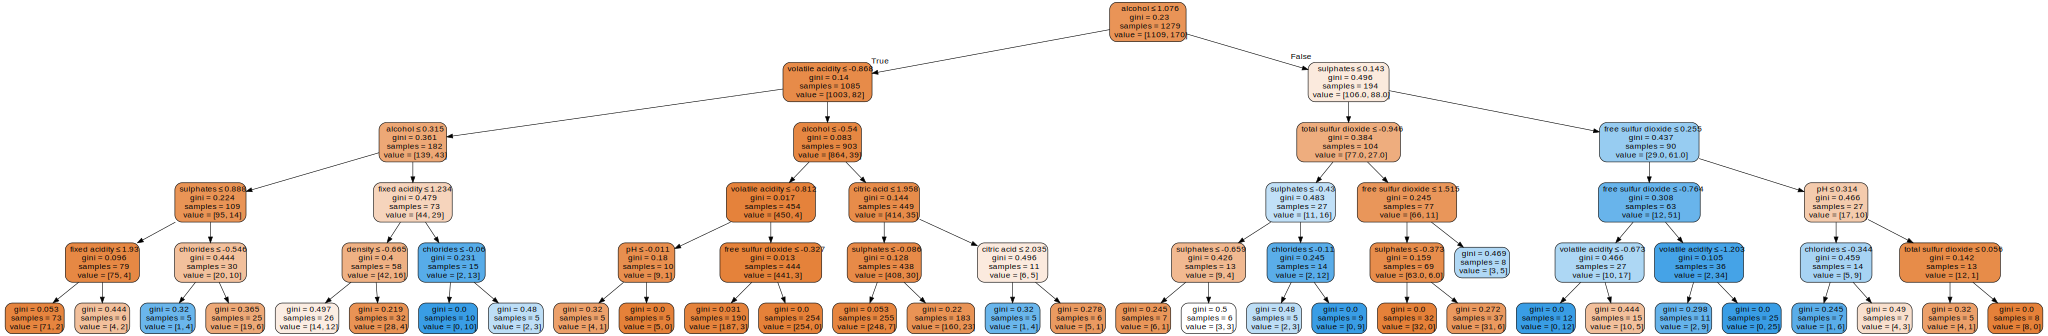

In [26]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model,
                           out_file=None,
                           feature_names=X.columns,
                           filled=True,
                           rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)

# Отображаем график
graph


# ✔️ Random Forest Classifier

**Random Forest** (Случайный лес) — это мощный алгоритм машинного обучения, основанный на ансамбле деревьев решений. Он объединяет несколько деревьев решений, чтобы сделать предсказания более точными и устойчивыми.

---

## 🔹 Как работает Random Forest?

1. **Создание множества деревьев решений**:
   - Создаются несколько деревьев решений на случайных поднаборах данных.
   - Каждое дерево делает своё предсказание (классифицирует).

2. **Объединение предсказаний**:
   - В задаче **классификации** выбирается наиболее частый ответ (голосование среди деревьев).

---

## 🔹 Почему это работает?

- **Снижает переобучение**: отдельные деревья могут быть нестабильными, но их ансамбль даёт более надёжный результат.
- **Эффективен на сложных данных**: работает с большими наборами признаков и сложными зависимостями.
- **Гибкость**: подходит как для классификации, так и для регрессии.

---

## 🔹 Преимущества Random Forest:

✅ **Точность** — благодаря ансамблю деревьев, Random Forest часто даёт более точные результаты, чем одно дерево решений.

✅ **Устойчивость к переобучению** — благодаря случайным подмножествам данных и признаков.

✅ **Подходит для сложных данных** — работает с большим числом признаков и нелинейными зависимостями.

---

## 🔹 Применение:

- **Классификация объектов** (например, диагностика заболеваний, фильтрация спама).
- **Предсказания вероятности** для различных классов.
- **Рекомендательные системы**, где нужно классифицировать предпочтения пользователей.


In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

test_pred = rf_clf.predict(X_test)
train_pred = rf_clf.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Logistic Regression", *evaluate(y_test, test_pred)]],
                          columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', "ROC AUC"])
results_df = pd.concat([results_df, results_df_2])


Test set evaluation:
_____________________________________
Accuracy: 0.9
Precision: 0.7272727272727273
Recall: 0.5106382978723404
F1 Score: 0.6
ROC AUC:  0.7388356324526537
__________________________________
Train set evaluation:
_____________________________________
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC:  1.0
__________________________________


# ✔️ Boosting для классификации

**Boosting** (бустинг) — это ансамблевый метод машинного обучения, который строит модели **последовательно**. Каждое новое дерево исправляет ошибки предыдущего, что делает модель более точной и устойчивой.

---

## 🔹 Как работает Boosting?

1. **Создаётся первое слабое дерево**, которое делает предсказания.
2. **Анализируются ошибки** первой модели, и следующие деревья обучаются на этих ошибках.
3. **Каждое новое дерево** пытается скорректировать ошибки предыдущих, улучшая общую точность.
4. **Итоговый прогноз** — это взвешенная сумма предсказаний всех деревьев.

---

## 🔹 Почему Boosting так хорош?

- **Обучение на ошибках**: модель улучшает свои предсказания на каждом шаге.
- **Часто превосходит Random Forest** в точности.
- **Популярные реализации**: Gradient Boosting (GBM), XGBoost, LightGBM, CatBoost.
- Прекрасно работает с **сложными зависимостями** в данных.

---

## Пример: Boosting для классификации с использованием **Gradient Boosting**




In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

test_pred = gb_clf.predict(X_test)
train_pred = gb_clf.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Logistic Regression", *evaluate(y_test, test_pred)]],
                          columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', "ROC AUC"])
results_df = pd.concat([results_df, results_df_2])

Test set evaluation:
_____________________________________
Accuracy: 0.878125
Precision: 0.625
Recall: 0.425531914893617
F1 Score: 0.5063291139240507
ROC AUC:  0.6907879354687866
__________________________________
Train set evaluation:
_____________________________________
Accuracy: 0.9601250977326036
Precision: 0.968503937007874
Recall: 0.7235294117647059
F1 Score: 0.8282828282828283
ROC AUC:  0.8599612793719833
__________________________________


#Попробуем поработать с фичами

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

def add_features(df):
    df['TotalAcidity'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']
    df['TotalSulfur'] = df['free sulfur dioxide'] + df['total sulfur dioxide']
    df['AlcoholQuality'] = df['alcohol'] * df['pH']
    return df

DataFrame = add_features(df)

y = df['quality_label']
X = df.drop(['quality_label'], axis=1)

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(['bad', 'good'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "SVM (Support Vector Machine)": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

In [31]:
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "ROC AUC"])

for name, model in models.items():
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_metrics = evaluate(y_train, train_pred)
    test_metrics = evaluate(y_test, test_pred)

    model_results = pd.DataFrame([{
        'Model': name,
        'Accuracy': test_metrics[0],
        'Precision': test_metrics[1],
        'Recall': test_metrics[2],
        'F1 Score': test_metrics[3],
        'ROC AUC': test_metrics[4],
    }])

    results_df = pd.concat([results_df, model_results], ignore_index=True)

print(results_df)


<ipython-input-31-7148718b9c6a>:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, model_results], ignore_index=True)


                          Model  Accuracy  Precision    Recall  F1 Score  \
0           Logistic Regression  0.859375   0.545455  0.255319  0.347826   
1                 Decision Tree  0.862500   0.551724  0.340426  0.421053   
2                 Random Forest  0.903125   0.722222  0.553191  0.626506   
3             Gradient Boosting  0.868750   0.586207  0.361702  0.447368   
4                      AdaBoost  0.856250   0.521739  0.255319  0.342857   
5  SVM (Support Vector Machine)  0.856250   1.000000  0.021277  0.041667   
6           K-Nearest Neighbors  0.834375   0.392857  0.234043  0.293333   
7                   Naive Bayes  0.828125   0.450000  0.765957  0.566929   

    ROC AUC  
0  0.609345  
1  0.646403  
2  0.758281  
3  0.658873  
4  0.607513  
5  0.510638  
6  0.585886  
7  0.802393  


# Работа с дисбалансом классов


In [32]:
# https://habr.com/ru/companies/otus/articles/769242/

import pandas as pd
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
}
results_df_resampled = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    train_pred = model.predict(X_train_resampled)
    test_pred = model.predict(X_test)

    train_metrics = evaluate(y_train_resampled, train_pred)
    test_metrics = evaluate(y_test, test_pred)

    model_results = pd.DataFrame([{
        'Model': name,
        'Accuracy': test_metrics[0],
        'Precision': test_metrics[1],
        'Recall': test_metrics[2],
        'F1 Score': test_metrics[3]
    }])

    results_df_resampled = pd.concat([results_df_resampled, model_results], ignore_index=True)

print("Results with SMOTE:")
print(results_df_resampled)

print("\nOriginal Results (without SMOTE):")
results_df


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-32-883d763e687f>:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df_resampled = pd.concat([results_df_resampled, model_results], ignore_index=True)


Results with SMOTE:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.809375   0.423913  0.829787  0.561151
1        Decision Tree  0.812500   0.423529  0.765957  0.545455
2        Random Forest  0.896875   0.629630  0.723404  0.673267
3    Gradient Boosting  0.875000   0.552239  0.787234  0.649123
4             AdaBoost  0.831250   0.457831  0.808511  0.584615

Original Results (without SMOTE):


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.859375,0.545455,0.255319,0.347826,0.609345
1,Decision Tree,0.862500,0.551724,0.340426,0.421053,0.646403
2,Random Forest,0.903125,0.722222,0.553191,0.626506,0.758281
3,Gradient Boosting,0.868750,0.586207,0.361702,0.447368,0.658873
4,AdaBoost,0.856250,0.521739,0.255319,0.342857,0.607513
5,SVM (Support Vector Machine),0.856250,1.000000,0.021277,0.041667,0.510638
6,K-Nearest Neighbors,0.834375,0.392857,0.234043,0.293333,0.585886
7,Naive Bayes,0.828125,0.450000,0.765957,0.566929,0.802393


можно посмотреть еще туть, общими словами описано: https://dzen.ru/a/YSVKTOP6BBmbZASz